# Séance 3: Affichage dynamique des trajectoires

L'objectif de cette séance sera de faire un affichage des trajectoires, qui n'a pu être fait auparavant par rapport au heatmap de la bibliothèque gmaps

In [1]:
import pandas as pd
import glob
import gmaps
import gmaps.datasets
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
import matplotlib.pyplot as plt


In [2]:
path = "Data/Privamov"
allFiles = glob.glob(path + "/privamov*")
frame = pd.DataFrame()
list_= []

for file_ in allFiles:
    df = pd.read_csv(file_,sep="\t", header=None,  names = ["Id", "DateTime", "Longitude", "Latitude"])
    list_.append(df)
frame = pd.concat(list_)

In [3]:
df1 = frame[["Latitude", "Longitude"]][frame["Id"] == 1]
df2 = frame[["Latitude", "Longitude"]][frame["Id"] == 2]
df11 = frame[["Latitude", "Longitude"]][frame["Id"] == 11]

In [4]:
lat1 = df1['Latitude'].values
long1 = df1['Longitude'].values

lat2 = df2['Latitude'].values
long2 = df2['Longitude'].values

lat11 = df11['Latitude'].values
long11 = df11['Longitude'].values

### Affichage des données sur des graphiques
Nous allons dans un premier temps afficher les données GPS sur des graphiques. Nous essayerons ensuite de voir les trajectoires

#### Affichage des données ID 1

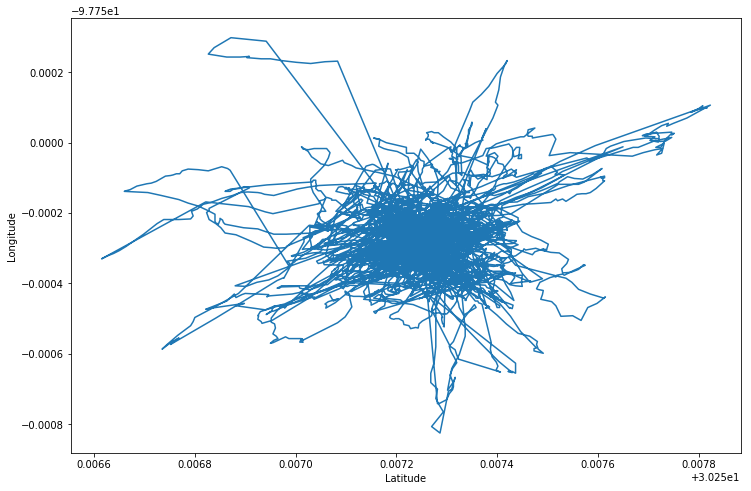

In [5]:
plt.figure(figsize=(12,8))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.plot(lat1, long1)
plt.show()

Ces données ne sont pas très intéressantes, dans la mesure où nous savons que la personne devrait dormir, et que donc les changements de coordonnées seraient dûes à du bruit.

#### Affichages des données ID 2

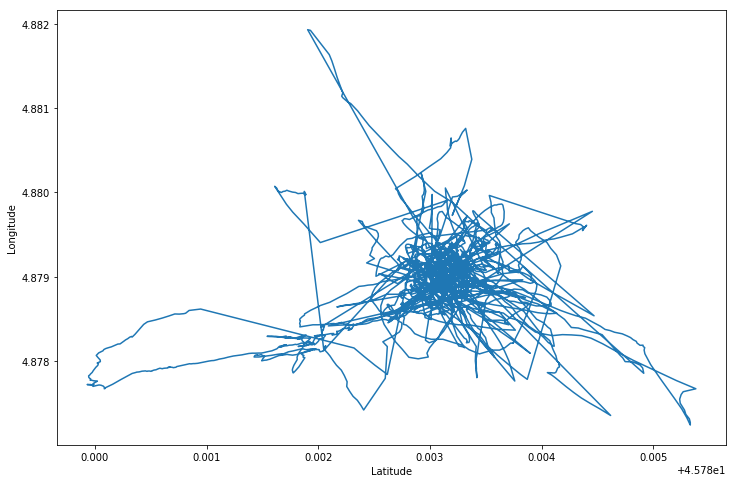

In [6]:
plt.figure(figsize=(12,8))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.plot(lat2, long2)
plt.show()

#### Affichage des données ID 11 brutes

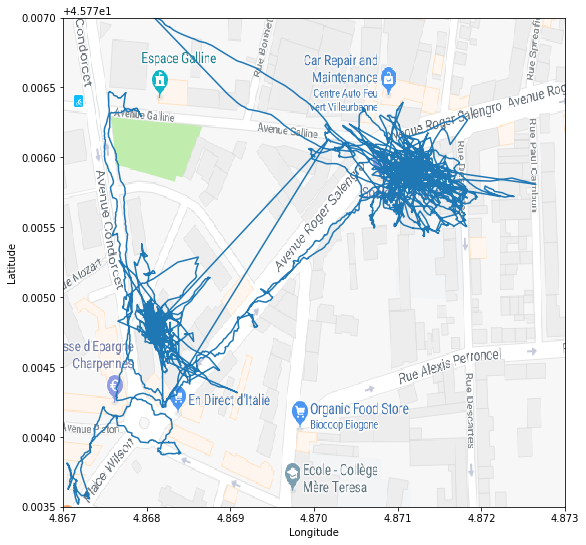

In [7]:
import matplotlib.image as image
import matplotlib.pyplot as plt

im = image.imread('Images/map11.png')

plt.figure(figsize=(9,9))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(long11, lat11)
plt.ylim(45.7735, 45.7770)
plt.xlim(4.867, 4.873)
plt.imshow(im, aspect='auto', extent=(4.866, 4.873, 45.7725, 45.7776), zorder=-1)
plt.show()

Ces données peuvent être intéressantes, car nous avons déduit auparavant qu'il y avait un déplacement. Ainsi, un plot python intéractif peut nous permettre d'observer les déplacements de la personnes durant le laps de temps

### Trajectoires dynamiques

Nous allons afficher les trajectoires des ID 2 et 11

#### Affichage de la trajectoire de l'ID 2

In [8]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def fct(x):
    df2_dyn = df2.iloc[0:x]
    lat2_dyn = df2_dyn['Latitude'].values
    long2_dyn = df2_dyn['Longitude'].values
    plt.figure(figsize=(12,8))
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.plot(lat2_dyn, long2_dyn)
    #plt.xlim(45.7735, 45.7770)
    #plt.ylim(4.867,4.873)
    plt.show()
    
interactive_plot = interactive(fct, x=(1, len(df2)))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=4522, description='x', max=9043, min=1), Output()), _dom_classes=('widget-interact',))

Nous avons réussi à voir les trajectoire de l'ID 2. Néanmoins, il existe des intervalles de temps où il manque un grand nombre de données (cf. séance 2). La trajectoire donnée peut-être donc faussée.

Nous allons donc nous intéresser aux déplacements de l'ID 11.

#### Affichage des déplacements de l'ID 11 brut.

In [9]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def fct(x):
    df11_dyn = df11.iloc[0:x]
    lat11_dyn = df11_dyn['Latitude'].values
    long11_dyn = df11_dyn['Longitude'].values
    plt.figure(figsize=(12,8))
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.plot(lat11_dyn, long11_dyn)
    plt.xlim(45.7735, 45.7770)
    plt.ylim(4.867,4.873)
    plt.show()
    
interactive_plot = interactive(fct, x=(1, len(df11)))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=16824, description='x', max=33647, min=1), Output()), _dom_classes=('widget-interact',))

Nous avons réussi à faire un plot intéractif avec l'ID 11. Par contre, ces données sont encore brutes. 

Nous allons donc utiliser les données que nous avions nettoyé dans les séances précédentes.

#### Affichage des déplacements de l'ID 11 avec données nettoyées.

In [10]:
df = pd.read_csv("Data/Privamov/id11.txt",sep="\t", header=None,  names = ["Id", "DateTime", "Latitude", "Longitude"])
coord11 = df[["Latitude", "Longitude"]]

In [11]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.image as image
import matplotlib.pyplot as plt

im = image.imread('Images/map11.png')

def fct(x):
    coord11_dyn = coord11.iloc[0:x]
    lat_coord11_dyn = coord11_dyn['Longitude'].values
    long_coord11_dyn = coord11_dyn['Latitude'].values
    plt.figure(figsize=(10,10))
    #plt.xlim(0.0035, 0.0070)
    #plt.ylim(4.867,4.873)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.plot(lat_coord11_dyn, long_coord11_dyn)
    plt.xlim(4.867,4.873)
    plt.ylim(45.7735, 45.7795)
    plt.show()
    
interactive_plot = interactive(fct, x=(1, len(coord11)))
#plt.imshow(im, aspect='auto', extent=(4.866, 4.873, 45.7725, 45.7776), zorder=-1)
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=148, description='x', max=296, min=1), Output()), _dom_classes=('widget-interact',))

Nous arrivons à visualiser une trajectoire plus ou moins rectiligne de la personne, ce qui correspond à un déplacement "normal".

Néanmoins, il reste des cas où le bruit est encore présent. Il faudrait donc un algorithme plus perfectionnné qui nous permettrait de nettoyer les données d'une meilleure façon.

### Conclusion

Nous avons réussi à afficher les trajectoires des différentes personnes concernées par Privamov.

Pour les prochaines séance, il faudrait:
* Un meilleur nettoyage de données
* Caractériser un référentiel idéal des données (cf. nombre de donnnées/minutes, vitesse etc...)
